<a href="https://colab.research.google.com/github/gitmystuff/DTSC5082/blob/main/Interview_Prep_2/interview_prep_simulation_scenarios_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Lifecycle Walkthrough

Name


## Instructions

In this assignment, you will be provided a randomly generated dataset that you will need to clean, prepare, do an exploratory data analysis on, and fit both a linear and logistic regression model. First thing is to run this notebook as is. The code in this notebook generates some messy data and two dependent variables, one for a linear regression model, and one for a logistic regression model. After you run the notebook, then continue to the Data Prep Process and complete the rest of the notebook. You are also asked to select the 5 most important features, and evaluate your models using appropriate metrics. Be sure to be able to explain the rational for each action you take. Finally provide a summary at the end of the notebook that let's your future boss know your analysis and findings.

## Getting Started

* Save a Copy in Drive
* Remove Copy of in filename
* Edit your name
* Clean up Colab Notebooks folder
* Submit shared link
* Do all your work in this notebook
* Run this notebook as is so you can get your simulated dataset
* **CLICK ON THE `Run all` BUTTON IN THE MENU TO GET STARTED**
* Once you run this notebook you will find your simulated dataset in the session storage (click on the folder icon in the left panel)
* Be aware that each time this notebook is executed will result in a new simulated data csv file
* Go through the **Create Data** section to get familiar with the data
* Start your code and cleaning in the **Data Prep Process** section and complete the rest of the notebook

**Keep in mind**

* If your model metrics are too high, almost perfect, find and remove features that are have a near perfect relationship with the DV. Document your rational.

**PII Fields**

* Names, email, phone, full address, and exact DOB are being generated. PII should be removed or transformed (hashing/tokenizing, extracting non-identifying parts like state or age-in-years) before modeling. Justify your actions.

**Missingness**

* Because missingness is injected across many columns at varying percentages, review MCAR, MNAR, and MAR and document your plan to drop vs impute; and document why.

**Data Hygiene Goals**

* Handle duplicates, PII, outliers, missingness, and type casting. Briefly justify each decision.

**Train/Validation Protocol**

* Use a proper holdout or cross-validation. Fit encoders/imputers on **train only** and apply to validation/test. State the split logic (stratified for classification if imbalance exists).

**Leakage and Bias Checks**

* Explicitly identify potential leakage sources, and discuss whether demographic variables should be included, excluded, or aggregated—and why.

## Data Prep Introduction

* Types and characteristics of data
* Duplicates
* Constants
* Quasi-Constants
* Missing data
* Outliers
* Datetime
* Feature creation
* Discretization
* Categorical encoding
* Variable transformation
* Scaling

When performing data preparation, the order of operations is crucial for a robust and reproducible machine learning pipeline. While there isn't one single "best" order that fits every scenario, a logical and widely accepted sequence follows a general flow from broad data quality checks to more specific feature transformations. This ensures that early steps, like removing bad data, don't get skewed by later transformations.

The general best-practice order is:

1.  **Remove Bad Data and Redundancy:** Begin by identifying and removing data that's problematic at a fundamental level.
    * **Duplicates**: Removing duplicate rows is the first step. They can bias a model and inflate performance metrics.
    * **Constants**: Columns with only one unique value (constants) provide no information for a model to learn from. Removing them early reduces dimensionality and simplifies your dataset.
    * **Quasi-Constants**: Similar to constants, these features have very little variance (e.g., 99% of values are the same). It's generally a good idea to remove them as they offer minimal predictive power.

2.  **Handle Missing Data and Outliers:** Once your data is free of redundant rows and features, you can address quality issues within the remaining columns.
    * **Missing Data**: Decide on a strategy for handling missing values. This can involve dropping rows or columns with too much missing data, or **imputing** values using methods like the mean, median, or more advanced techniques.
    * **Outliers**: After addressing missing data, identify and handle outliers. Outliers can heavily influence the mean and other statistics, so it's important to deal with them before transformations or scaling.

3.  **Perform Feature Engineering:** This is a creative and domain-specific step where you can extract more information from your existing features.
    * **Datetime**: Extracting meaningful features from datetime columns, such as month, day of the week, or holiday flags, is a common and powerful technique. This should be done before more generic transformations.
    * **Feature Creation**: This is the core of feature engineering, where you create new variables based on your domain knowledge. For example, creating a `BMI` feature from `height` and `weight`.

4.  **Transform Variables and Features:** With a clean and feature-rich dataset, you can now prepare the variables for the specific requirements of your chosen model.
    * **Discretization**: If needed, convert continuous numerical features into discrete bins. This is often used for algorithms that benefit from binned data, like certain tree-based models.
    * **Categorical Encoding**: Convert all categorical features (which may have been `object` or `category` data types) into a numerical format. This is a non-negotiable step for most machine learning algorithms. The choice between one-hot encoding, label encoding, etc., depends on the nature of the data.

5.  **Scale Features:** The final step before training a model is often scaling, which adjusts the range of numerical features.
    * **Scaling**: This is especially important for distance-based algorithms like **K-nearest Neighbors** and models that use gradient descent, such as **Linear Regression** and **Neural Networks**. Common techniques are **Normalization** (Min-Max Scaling) and **Standardization** (Z-Score Scaling). This should be done **after** all other transformations to prevent data leakage and ensure the scaling is based on the final, prepared feature values.


# Create Data

### Seed the Project

In [ ]:
import time
import numpy as np
import random

def generate_user_seed():
    # Get current time in nanoseconds (more granular)
    nanoseconds = time.time_ns()

    # Add a small random component to further reduce collision chances
    random_component = random.randint(0, 1000)  # Adjust range as needed

    # Combine them (XOR is a good way to mix values)
    seed = nanoseconds ^ random_component

    # Ensure the seed is within the valid range for numpy's seed
    seed = seed % (2**32)  # Modulo to keep it within 32-bit range

    return seed

user_seed = generate_user_seed()
print(user_seed)
random_state = np.random.seed(user_seed)

2254451965


### Faker

In [ ]:
pip install Faker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.7 MB/s eta 0:00:00


In [ ]:
state_names=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [ ]:
# create demographic data
import numpy as np
import pandas as pd
from faker import Faker
fake = Faker()

output = []
for x in range(1000):
  binary = np.random.choice(['binary_1', 'binary_2'], p=[0.5, 0.5])
  output.append({
        'binary': binary, # sex assigned at birth
        'given_name': fake.first_name_female() if binary=='binary_1' else fake.first_name_male(),
        'datetime': fake.date_time_this_decade(),
        'surname': fake.last_name(),
        'date_of_birth': fake.date_of_birth(),
        'day_of_week': fake.day_of_week(),
        'phone_number': fake.phone_number(),
        'email': fake.email(),
        'address': fake.address(),
        'city': fake.city(),
        'state': np.random.choice(state_names),
        'zipcode': fake.zipcode(),
        })

demographics = pd.DataFrame(output)
demographics.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode
0,binary_1,Stephanie,2025-11-19 06:24:05.938342,Bruce,1959-06-16,Friday,779.409.2050,leviromero@example.org,"1111 Cooper Port Apt. 887\nJacquelinebury, PA ...",Lake Joshua,North Carolina,60046
1,binary_2,Jonathan,2020-12-17 15:51:02.601279,Clark,1922-01-20,Monday,(489)509-5458,icallahan@example.net,"3546 Weiss Keys Apt. 608\nWest Anthonyside, WA...",South Nancy,Maryland,72448
2,binary_1,Samantha,2023-04-20 11:46:07.352984,Ross,1994-06-02,Thursday,2466915109,christina67@example.net,"029 Vaughan Field\nNorth Melissa, VT 75093",Dwaynefort,Vermont,83193
3,binary_2,Roger,2025-12-20 16:12:36.901711,Ware,1997-10-06,Thursday,(543)387-8244x96733,kaiseramanda@example.net,"0587 Vang Port Suite 987\nErictown, NC 20729",Davidburgh,New Hampshire,28977
4,binary_1,Christine,2024-10-17 08:18:38.558961,Green,2008-10-20,Saturday,275-714-9367,craigmegan@example.org,"903 Jeffrey Ranch\nWilliamsstad, CA 21782",South Chadmouth,Oregon,50854


In [ ]:
def parse_address_v2(text):
  """
  Parses an address string into street address, city, state, and zipcode.
  This version handles potential variations in the input format.

  Args:
    text: The address string to parse.

  Returns:
    A dictionary containing the parsed address components.
  """

  try:
    # Split the input into lines
    lines = text.strip().split('\n')

    # Extract the street address from the first line
    street_address = lines[0].strip()

    # Extract the city, state, and zipcode from the second line
    city_state_zip = lines[1].strip().split(',')
    city = city_state_zip[0].strip()
    state_zip = city_state_zip[1].strip().split()
    state = state_zip[0].strip()
    zipcode = state_zip[1].strip()

    return {
        'street_address': street_address,
        'city': city,
        'state': state,
        'zipcode': zipcode
    }

  except (IndexError, ValueError):
    return None

# Example usage
text = "80974 Jeffrey Mountains\nWest Benjamin, IL 82801"
address = parse_address_v2(text)

if address:
  print(address)
else:
  print("Could not parse the address.")

{'street_address': '80974 Jeffrey Mountains', 'city': 'West Benjamin', 'state': 'IL', 'zipcode': '82801'}


In [ ]:
# Apply the parse_address function to each row of the 'address' column
demographics[['nu_address', 'nu_city', 'nu_state', 'nu_zipcode']] = demographics['address'].apply(lambda x: pd.Series(parse_address_v2(x)))

demographics.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode,nu_address,nu_city,nu_state,nu_zipcode
0,binary_1,Stephanie,2025-11-19 06:24:05.938342,Bruce,1959-06-16,Friday,779.409.2050,leviromero@example.org,"1111 Cooper Port Apt. 887\nJacquelinebury, PA ...",Lake Joshua,North Carolina,60046,1111 Cooper Port Apt. 887,Jacquelinebury,PA,15522
1,binary_2,Jonathan,2020-12-17 15:51:02.601279,Clark,1922-01-20,Monday,(489)509-5458,icallahan@example.net,"3546 Weiss Keys Apt. 608\nWest Anthonyside, WA...",South Nancy,Maryland,72448,3546 Weiss Keys Apt. 608,West Anthonyside,WA,09961
2,binary_1,Samantha,2023-04-20 11:46:07.352984,Ross,1994-06-02,Thursday,2466915109,christina67@example.net,"029 Vaughan Field\nNorth Melissa, VT 75093",Dwaynefort,Vermont,83193,029 Vaughan Field,North Melissa,VT,75093
3,binary_2,Roger,2025-12-20 16:12:36.901711,Ware,1997-10-06,Thursday,(543)387-8244x96733,kaiseramanda@example.net,"0587 Vang Port Suite 987\nErictown, NC 20729",Davidburgh,New Hampshire,28977,0587 Vang Port Suite 987,Erictown,NC,20729
4,binary_1,Christine,2024-10-17 08:18:38.558961,Green,2008-10-20,Saturday,275-714-9367,craigmegan@example.org,"903 Jeffrey Ranch\nWilliamsstad, CA 21782",South Chadmouth,Oregon,50854,903 Jeffrey Ranch,Williamsstad,CA,21782


In [ ]:
# drop address, city, state, zipcode and rename nu_ etc.
demographics.drop(['address', 'city', 'state', 'zipcode'], axis=1, inplace=True)
demographics.rename(columns={'nu_address': 'address', 'nu_city': 'city', 'nu_state': 'state', 'nu_zipcode': 'zipcode'}, inplace=True)
demographics.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode
0,binary_1,Stephanie,2025-11-19 06:24:05.938342,Bruce,1959-06-16,Friday,779.409.2050,leviromero@example.org,1111 Cooper Port Apt. 887,Jacquelinebury,PA,15522
1,binary_2,Jonathan,2020-12-17 15:51:02.601279,Clark,1922-01-20,Monday,(489)509-5458,icallahan@example.net,3546 Weiss Keys Apt. 608,West Anthonyside,WA,09961
2,binary_1,Samantha,2023-04-20 11:46:07.352984,Ross,1994-06-02,Thursday,2466915109,christina67@example.net,029 Vaughan Field,North Melissa,VT,75093
3,binary_2,Roger,2025-12-20 16:12:36.901711,Ware,1997-10-06,Thursday,(543)387-8244x96733,kaiseramanda@example.net,0587 Vang Port Suite 987,Erictown,NC,20729
4,binary_1,Christine,2024-10-17 08:18:38.558961,Green,2008-10-20,Saturday,275-714-9367,craigmegan@example.org,903 Jeffrey Ranch,Williamsstad,CA,21782


### Create Independent Variable Correlated with Class

In [ ]:
import numpy as np
import pandas as pd

def generate_feature(df, class_col, coeff, intercept):
    """
    Generates normally distributed feature data for a logistic regression model.

    Args:
        df: The pandas DataFrame containing the class column.
        class_col: The name of the class column (containing 0s and 1s).
        coeff: The coefficient for the feature in the logistic regression model.
        intercept: The intercept of the logistic regression model.

    Returns:
        A pandas Series containing the generated feature data.
    """

    # Generate probabilities based on the class
    probs = np.random.rand(len(df))  # Initial random probabilities
    probs = np.where(df[class_col] == 1, probs * 0.8 + 0.2, probs * 0.8)  # Adjust for class

    # Apply the inverse logit (logit) function
    logits = np.log(probs / (1 - probs))

    # Calculate the feature values
    feature_values = (logits - intercept) / coeff

    return pd.Series(feature_values)



### Make Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

def make_linear_y(row):
  model = LogisticRegression()
  model.fit(X, y)
  coefficients = model.coef_
  intercept = model.intercept_
  f_of_x = intercept + coefficients[0][0]*row['informative_1'] + coefficients[0][1]*row['informative_2']
  # print(f_of_x[0])
  return f_of_x[0]

# Set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=random_state)
df = pd.DataFrame(X, columns=['informative_1', 'informative_2'])
df = pd.concat([demographics, df], axis=1).reset_index(drop=True)

df['target'] = df.apply(make_linear_y, axis=1) # an independent variable
df['class'] = y # the dependent variable
df['corr_feature_class'] = generate_feature(df, 'class', 0.5, -1)
df.head()

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,state,zipcode,informative_1,informative_2,target,class,corr_feature_class
0,binary_1,Stephanie,2025-11-19 06:24:05.938342,Bruce,1959-06-16,Friday,779.409.2050,leviromero@example.org,1111 Cooper Port Apt. 887,Jacquelinebury,PA,15522,-0.942141,0.852150,-3.473176,0,-6.204423
1,binary_2,Jonathan,2020-12-17 15:51:02.601279,Clark,1922-01-20,Monday,(489)509-5458,icallahan@example.net,3546 Weiss Keys Apt. 608,West Anthonyside,WA,09961,0.656594,-0.967432,2.974288,1,0.072103
2,binary_1,Samantha,2023-04-20 11:46:07.352984,Ross,1994-06-02,Thursday,2466915109,christina67@example.net,029 Vaughan Field,North Melissa,VT,75093,-2.588166,-2.661498,-4.410844,0,0.414157
3,binary_2,Roger,2025-12-20 16:12:36.901711,Ware,1997-10-06,Thursday,(543)387-8244x96733,kaiseramanda@example.net,0587 Vang Port Suite 987,Erictown,NC,20729,-0.773056,1.561084,-3.745106,0,-10.575601
4,binary_1,Christine,2024-10-17 08:18:38.558961,Green,2008-10-20,Saturday,275-714-9367,craigmegan@example.org,903 Jeffrey Ranch,Williamsstad,CA,21782,0.942673,0.983551,1.718956,1,2.905323


### Automation Functions

1. gen_null(series, perc)
2. gen_quasi_constants(primary_label, variation_percentage=.2, replace=False)
3. gen_normal_data(mu=0, std=1, size=len(df))
4. gen_uniform_data(size=len(df))
5. gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
6. gen_correlated_normal_series(original_series, target_correlation, size=len(df))
7. gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
8. gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
9. gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000)
10. gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10)
11. random_choice_data(choices, size)

In [ ]:
# functions
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize


def gen_null(series, perc):
  """
  Introduces null values (np.nan) into a list based on a specified percentage.

  Args:
      var: The variable to modify.
      perc: The percentage of values to replace with nulls (0-100).

  Returns:
      The modified variable with null.
  """
  var = series.copy()
  num_nulls = int(len(var) * (perc / 100))
  indices_to_replace = np.random.choice(len(var), num_nulls, replace=False)

  for idx in indices_to_replace:
      var[idx] = np.nan

  return var

def gen_quasi_constants(primary_label, variation_percentage=.2, size=len(df)):
  """
  Generates quasi-constant labels for a Series, with a small percentage of variation.

  Args:
      primary_label: The main label to use for most values.
      variation_percentage: The percentage of labels to vary (0-100).

  Returns:
      A new Series containing the quasi-constant labels.
  """

  series = pd.Series(np.full(size, primary_label))
  num_variations = int(size * (variation_percentage / 100))
  variation_indices = np.random.choice(series.index, num_variations, replace=False)
  primary_label = primary_label + '_0'
  variation1 = primary_label + '_1'
  variation2 = primary_label + '_2'

  labels = pd.Series([primary_label] * len(series), index=series.index)
  labels.loc[variation_indices] = np.random.choice([variation1, variation2], size=num_variations)  # Adjust variations as needed

  return labels

def gen_normal_data(mu=0, std=1, size=len(df)):
  """
  Generates a normal dataset given the mean and standard deviation

  Args:
        mu: The mean of the normal distribution.
        std: The standard deviation of the normal distribution.
        size: The number of data points to generate.

  Returns:
        A normally distributed series.
  """
  return np.random.normal(mu, std, size)

def gen_uniform_data(size=len(df)):
  """
  Generates a uniform dataset

  Args:
        size: The number of data points to generate.

  Returns:
        A uniform distributed series.
  """
  return np.random.uniform(size=size)

def gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df)):
  """
  Generates two datasets with a multivariate normal distribution given the mean and covariance matrix

  Args:
        mean: The mean of each of the datasets.
        cov: The covariance matrix of the datasets.
        size: The number of data points to generate.

  Returns:
        Two correlated series.
  """
  ds1, ds2 = np.random.multivariate_normal(mean, cov, size, tol=1e-6).T # ds = dataset
  return ds1, ds2

def gen_correlated_normal_series(original_series, target_correlation, size=len(df)):
  """
  Generates a correlated series based on a given series.

  This function takes an original series as input and generates a new series
  that is correlated with the original series. The correlation between the
  original and generated series is approximately equal to the specified
  target correlation.

  The generated series is created by linearly transforming the original series
  and adding Gaussian noise with an adjusted standard deviation to achieve the
  desired correlation.

  Args:
      original_series (numpy.ndarray): The original series.
      target_correlation (float): The desired Pearson correlation coefficient
          between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series.
  """
  return np.mean(original_series) + target_correlation * (original_series - np.mean(original_series)) \
  +  np.random.normal(0, np.sqrt(1 - target_correlation**2) * np.std(original_series), len(original_series))
  """
  Explanation

  This one-liner leverages the properties of linear transformations and normal distributions to generate a correlated series.

  It first centers the original_series by subtracting its mean.
  It then scales this centered series by the target_correlation.
  Finally, it adds Gaussian noise with a standard deviation adjusted to ensure the overall correlation matches the target_correlation.
  """

def gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df)):
  """
  Work in progress

  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.
      size: The number of data points to generate.

  Returns:
      The generated correlated series with a uniform distribution.
  """
  z_scores = (original_series - np.mean(original_series)) / np.std(original_series)
  correlation_coefficient=.7
  return norm.cdf(correlation_coefficient * norm.ppf(np.random.uniform(size=size)) + np.sqrt(1 - correlation_coefficient**2) * z_scores)

def pearson_r_func(x, y, y_mean, y_std, desired_r):
    x_mean = np.mean(x)
    x_std = np.std(x)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = x_std * y_std * len(x)
    calculated_r = numerator / denominator
    return (calculated_r - desired_r)**2  # Minimize the squared difference

def minimize_r(original_series, target_correlation, size=len(df)):
    y = original_series
    y_mean = np.mean(y)
    y_std = np.std(y)
    desired_r = target_correlation

    # Initial guess for x values
    x0 = np.random.uniform(size=len(original_series))

    # Solve for x
    result = minimize(pearson_r_func, x0, args=(y, y_mean, y_std, desired_r))

    if result.success:
        x_solution = result.x
        # print("Solution for x:", x_solution)
        return x_solution
    else:
        print("Optimization failed.")

def gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3):
    """
    Generates a normal distribution with outliers.

    Args:
        mean (float): The mean of the normal distribution.
        std_dev (float): The standard deviation of the normal distribution.
        size (int): The number of samples to generate.
        outlier_percentage (float): The percentage of outliers to introduce (between 0 and 1).
        outlier_magnitude (float): The magnitude by which outliers deviate from the mean.

    Returns:
        numpy.ndarray: The generated data with outliers.
    """
    data = np.random.normal(mean, std_dev, size)
    num_outliers = int(size * outlier_percentage)
    outlier_indices = np.random.choice(size, num_outliers, replace=False)
    for index in outlier_indices:
        if np.random.rand() < 0.5:
            data[index] += outlier_magnitude
        else:
            data[index] -= outlier_magnitude

    return data

def gen_standard_scaling(mean=50, std_dev=10, size=len(df), scale_factor=1000):
  """
  Generates data with a specified mean and standard deviation, then scales it by a factor to create a distribution needing scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      scale_factor (float): The factor by which to scale the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """
  original_data = np.random.normal(mean, std_dev, size)
  return original_data * scale_factor

def gen_minmax_scaling(mean=50, std_dev=10, size=len(df), range_factor=10):
  """
  Generates data with a specified mean and standard deviation, then scales and shifts it to create a distribution needing MinMax scaling.

  Args:
      mean (float): The mean of the original distribution.
      std_dev (float): The standard deviation of the original distribution.
      size (int): The number of samples to generate.
      range_factor (float): The factor to expand the range of the original distribution.

  Returns:
      numpy.ndarray: The generated data needing scaling.
  """

  # Generate the original data
  original_data = np.random.normal(mean, std_dev, size)

  # Expand the range of the data
  min_val = np.min(original_data)
  max_val = np.max(original_data)
  return (original_data - min_val) * range_factor + min_val

def random_choice_data(choices, size):
  """
  Generates a new series correlated with the given series based on the specified correlation coefficient,
  using rank correlation to ensure the generated series follows a uniform distribution.

  Args:
      original_series (numpy.ndarray or list): The original series.
      correlation_coefficient (float): The desired correlation coefficient between the original and generated series.

  Returns:
      numpy.ndarray: The generated correlated series with a uniform distribution.
  """
  return np.random.choice(choices, size=size)


In [ ]:
# categorical variables with little correlation to DV
df['random choice 2'] = random_choice_data(['Rand Choice 1', 'Rand Choice 2'], size=len(df))
df['random choice 4'] = random_choice_data(['North', 'South', 'East', 'West'], size=len(df))
df['random choice 7'] = random_choice_data(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(df))

# categorical random choices with random # of labels
num_labels = np.random.randint(3, 5)
df[f'random label num {num_labels}'] = random_choice_data([f'label num lo {i}' for i in range(1, num_labels + 1)], size=len(df))

num_labels = np.random.randint(10, 15)
df[f'random label num {num_labels}'] = random_choice_data([f'label num hi {i}' for i in range(1, num_labels + 1)], size=len(df))

In [ ]:
# categorical variables correlated with target
df['pd qcut1'] = pd.qcut(df['target'], 2, labels=['Low', 'High']) # bi label
df['pd qcut2'] = pd.qcut(df['target'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # 4 labels

quantiles = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
df['pd qcut3'] = pd.qcut(df['target'], quantiles, labels=['G1', 'G2', 'G3', 'G4', 'G5', 'G6']) # 6 labels

In [ ]:
# generate four numerical normally distributed continuous features that have a correlation greater than absolute value of .5 with each other
# gen_multivariate_normal_data(mean=[0, 0], cov=[[1, 0], [0, 1]], size=len(df))
df['multicollinearity 1'], df['multicollinearity 2'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .7], [.7, 1]], size=len(df))
df['multicollinearity 3'], df['multicollinearity 4'] = gen_multivariate_normal_data(mean=[0, 0], cov=[[1, .9], [.9, 1]], size=len(df))

In [ ]:
# generate two normally distributed features that are correlated with the target
# gen_correlated_normal_series(original_series, target_correlation, size=len(df))
df['correlated w target 1'] = gen_correlated_normal_series(df['target'], target_correlation=.5)
df['correlated w target 2'] = gen_correlated_normal_series(df['target'], target_correlation=.7)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   binary                 1000 non-null   object        
 1   given_name             1000 non-null   object        
 2   datetime               1000 non-null   datetime64[ns]
 3   surname                1000 non-null   object        
 4   date_of_birth          1000 non-null   object        
 5   day_of_week            1000 non-null   object        
 6   phone_number           1000 non-null   object        
 7   email                  1000 non-null   object        
 8   address                890 non-null    object        
 9   city                   890 non-null    object        
 10  state                  890 non-null    object        
 11  zipcode                890 non-null    object        
 12  informative_1          1000 non-null   float64       
 13  info

                uniform corr 1  uniform corr 2    target
uniform corr 1        1.000000        0.512216  0.711237
uniform corr 2        0.512216        1.000000  0.736430
target                0.711237        0.736430  1.000000


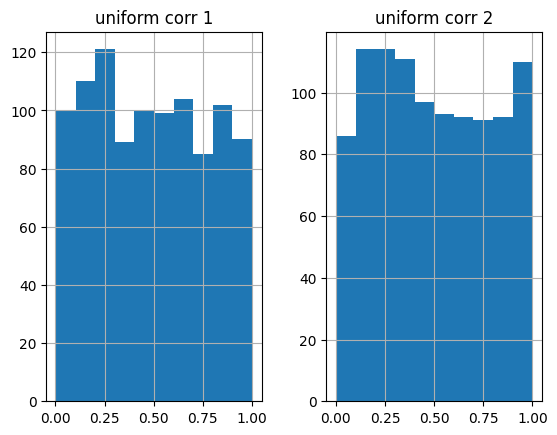

In [ ]:
# generate two uniformly distributed features that are correlated with the target
# gen_correlated_uniform_series(original_series, correlation_coefficient=0, size=len(df))
df['uniform corr 1'] = gen_correlated_uniform_series(df['target'])
df['uniform corr 2'] = gen_correlated_uniform_series(df['target'])

print(df[['uniform corr 1', 'uniform corr 2', 'target']].corr())
df[['uniform corr 1', 'uniform corr 2']].hist();

In [ ]:
# create two features that are duplicates of other features
df['duplicate_1'] = df['informative_1']
df['duplicate_2'] = df['informative_2']

In [ ]:
# create two numerical features with outliers
df['outliers 1'] = gen_outliers(mean=0, std_dev=1, size=len(df), outlier_percentage=0.1, outlier_magnitude=3)
df['outliers 2'] = gen_outliers(mean=3, std_dev=2, size=len(df), outlier_percentage=0.2, outlier_magnitude=2)

In [ ]:
# create a numerical feature that needs standard scaling
df['standard scaling'] = gen_standard_scaling()

In [ ]:
# create a numerical feature that needs min max scaling
df['min max scaling'] = gen_minmax_scaling()

In [ ]:
# generate null values
for col in df.drop(['class', 'informative_1', 'informative_2', 'target', 'duplicate_1', 'duplicate_2'], axis=1).columns:
    df[col] = gen_null(df[col], np.random.choice([0, 5, 10, 20, 30, 50], size=1).item())

In [ ]:
# create two features that have constant values
df['constant_1'] = 'constant_value'
df['constant_2'] = 'constant_value'

In [ ]:
# create two features with semi constant values
df['semi_constant_1'] = gen_quasi_constants('q_const', variation_percentage = 1)
df['semi_constant_2'] = gen_quasi_constants('q_const', variation_percentage = 1)

In [ ]:
print(df.info())  # check your work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   binary                 500 non-null    object        
 1   given_name             1000 non-null   object        
 2   datetime               950 non-null    datetime64[ns]
 3   surname                900 non-null    object        
 4   date_of_birth          800 non-null    object        
 5   day_of_week            500 non-null    object        
 6   phone_number           500 non-null    object        
 7   email                  1000 non-null   object        
 8   address                705 non-null    object        
 9   city                   453 non-null    object        
 10  state                  890 non-null    object        
 11  zipcode                616 non-null    object        
 12  informative_1          1000 non-null   float64       
 13  info

In [ ]:
# add duplicates
dupes = df.loc[0:9]
df = pd.concat([df, dupes], axis=0)

# shuffle all columns
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1, axis=1)

# shuffle selected columns
demographic_columns = demographics.columns
remaining_columns = [col for col in df.columns if col not in demographic_columns]
# print(remaining_columns)
np.random.shuffle(remaining_columns)

# Reassemble the DataFrame with the shuffled columns
df = df[list(demographic_columns) + list(remaining_columns)]

# move target to the end of the list
class_var = 'class'
df = df[df.drop('class', axis=1).columns.tolist() + [class_var]]

print(df.shape)
print(df.info())
df.head()

(1010, 43)
<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 9
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   binary                 505 non-null    object        
 1   given_name             1010 non-null   object        
 2   datetime               959 non-null    datetime64[ns]
 3   surname                909 non-null    object        
 4   date_of_birth          805 non-null    object        
 5   day_of_week            505 non-null    object        
 6   phone_number           506 non-null    object        
 7   email                  1010 non-null   object        
 8   address                714 non-null    object        
 9   city                   460 non-null    object        
 10  state                  900 non-null    object        
 11  zipcode                622 non-null    object        
 12  pd qcut2               507 non-null    category      
 13  

,binary,given_name,datetime,surname,date_of_birth,day_of_week,phone_number,email,address,city,...,min max scaling,corr_feature_class,standard scaling,correlated w target 1,random label num 10,semi_constant_2,multicollinearity 4,uniform corr 1,random choice 4,class
0,NaN,Stephanie,2025-11-19 06:24:05.938342,Bruce,NaN,Friday,779.409.2050,leviromero@example.org,NaN,Jacquelinebury,...,495.276391,-6.204423,42237.017264,0.107824,label num hi 1,q_const_0,0.053048,0.023694,East,0
1,NaN,Jonathan,2020-12-17 15:51:02.601279,Clark,1922-01-20,NaN,NaN,icallahan@example.net,3546 Weiss Keys Apt. 608,West Anthonyside,...,287.468055,NaN,49601.914431,-0.392717,label num hi 6,q_const_0,-2.001410,0.450677,North,1
2,binary_1,Samantha,2023-04-20 11:46:07.352984,Ross,1994-06-02,NaN,NaN,christina67@example.net,029 Vaughan Field,North Melissa,...,426.217059,NaN,45963.817697,0.069774,label num hi 2,q_const_0,-1.028093,0.130656,South,0
3,NaN,Roger,2025-12-20 16:12:36.901711,NaN,NaN,Thursday,(543)387-8244x96733,kaiseramanda@example.net,0587 Vang Port Suite 987,Erictown,...,495.368862,NaN,50896.972429,-5.297711,label num hi 1,q_const_0,NaN,0.009620,South,0
4,NaN,Christine,2024-10-17 08:18:38.558961,Green,NaN,NaN,275-714-9367,craigmegan@example.org,903 Jeffrey Ranch,NaN,...,275.497827,2.905323,59054.691916,4.944859,label num hi 3,q_const_0,NaN,0.784865,East,1


In [ ]:
df.to_csv('simulated_data.csv', index=False)

## Mount Drive

This is optional, if you want to save your simulated_data.csv to your Google Drive.

In [ ]:
# # Mount Drive
# import shutil

# # Source file path (within your Drive)
# source_file = '/content/filename'

# # Destination path (root of your Drive)
# destination_path = '/content/drive/MyDrive/filepath/filename'

# # Copy the file
# shutil.copy(source_file, destination_path)

# Data Prep Process

## Load Data

In [ ]:
# load the simulated data
# print the shape
# print the info
# print the head


## Types and Characteristics of Data

**Numerical Data**

This refers to columns with a numerical data type, typically integers (`int64`) or floating-point numbers (`float64`). These data represent quantities and are used for mathematical operations.

* **Characteristics**:
    * **Continuous**: Can take any value within a given range (e.g., height, temperature, price).
    * **Discrete**: Can only take specific, distinct values (e.g., number of children, counts).
    * **Order**: The values have a meaningful order and can be compared (e.g., 10 is greater than 5).
    * **Mathematical Operations**: Can be used for calculations like mean, standard deviation, and regression analysis.

**Object/String Data**

This refers to columns with an `object` data type, which in pandas often means they contain text or strings. These are non-numeric and don't have inherent mathematical properties.

* **Characteristics**:
    * **Nominal**: Categories without a meaningful order (e.g., colors like "red," "blue," "green").
    * **Textual**: Contains free-form text, which might require natural language processing (NLP) techniques for analysis.
    * **High Cardinality**: Often contain a large number of unique values, making them difficult to use directly in many machine learning models without preprocessing.

**Categorical Data**

This refers to columns with a `category` data type. A `category` type is a pandas-specific data type that is more memory-efficient than `object` for columns with a limited number of unique values.

* **Characteristics**:
    * **Ordinal**: Categories with a meaningful order (e.g., "low," "medium," "high").
    * **Nominal**: Categories without a meaningful order (as with `df_object`).
    * **Memory Efficient**: Internally stores an integer representation of each category, which is more efficient for storage and computation.

**Categorical Features**

This is a combined group of columns from both the `category` and `object` data types. These columns represent features that are **not** numerical and will likely need to be converted to a numerical format using encoding techniques (like **One-Hot Encoding** or **Label Encoding**) before being used in most machine learning models.

* **Characteristics**:
    * **Mixed Types**: A collection of both `category` and `object` data types.
    * **Preprocessing Required**: These features cannot be directly used in most machine learning algorithms. They must be preprocessed to a numerical representation.
    * **High-level Representation**: This group represents all the columns in a dataset that are qualitative rather than quantitative.

In [ ]:
# df_numerical = df.select_dtypes(include='number').columns
# df_object = df.select_dtypes(include=['object']).columns
# df_discreet = df.select_dtypes(include=['category']).columns
# df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
# print("Numerical Data:")
# print(df_numerical)
# print("/nObject Data:")
# print(df_object)
# print("/nDiscreet Data:")
# print(df_discreet)
# print("/nCategorical Data:")
# print(df_categorical_features

## Row Duplicates

In [ ]:
# first identify and then delete any row duplicates

## Column Duplicates


In [ ]:
# first identify and then delete duplicate features

## Constants

Features with constant values should be deleted because they provide **zero information or predictive power** to a machine learning model.

* **The Problem:** Machine learning models, especially those based on statistical principles (like regression) or information theory (like decision trees), rely on **variance** or **differences** in the data to learn relationships.
* **The Effect:** A feature where *every* row has the exact same value (e.g., a column called `Country` where every value is 'USA') cannot help distinguish one data point (row) from another. It offers no insight into why the target variable (what you are trying to predict) changes.
    * **Analogy:** Imagine trying to predict a student's grade based on whether they attended a school. If *every* student in your dataset attended a school, that "attended school" feature is useless for predicting grades.
* **Mathematical Issue:** Many machine learning algorithms involve calculations based on the standard deviation or variance of features.
    * For example, in standardizing data (a common preprocessing step), you divide by the standard deviation: $z = \frac{x - \mu}{\sigma}$.
    * If a feature is constant, its standard deviation ($\sigma$) is **zero**. **Dividing by zero** is mathematically undefined and will cause algorithms to fail, raise errors, or produce unstable results.

* **The Benefit:** While a single constant column doesn't add much overhead, in datasets with hundreds or thousands of features, removing all zero-variance columns is a form of **dimensionality reduction**.
* **The Result:** Removing these irrelevant features speeds up model training and prediction times, and reduces memory usage, all without any loss in predictive performance.



In [ ]:
# first identify and then delete any constants

## Quasi-Constants

A quasi-constant feature is a feature (column) where **a single value is present for a vast majority of the observations** (rows), but not *all* of them.

* **Constant Feature:** 100% of values are the same. (e.g., all 1s)
* **Quasi-Constant Feature:** 99.5% of values are the same, and the remaining 0.5% are different. (e.g., 995 rows are 'A', 5 rows are 'B')

We delete quasi constant values because **they provide extremely little predictive value** but increase model complexity and computational cost.

1.  **Low Information:** The small variations have minimal, if any, predictive power because they affect only a tiny fraction of the dataset.
2.  **Overfitting Risk:** Including features that are mostly constant might occasionally cause a complex model to *overfit* to the few rare non-constant values, learning noise instead of the general pattern.
3.  **Efficiency:** Removing them is a straightforward way to reduce the dimensionality of your dataset without meaningfully impacting the model's performance.

Because "quasi-constant" is a subjective term, you must define a **threshold** to decide when a feature has too little variance to be useful. This threshold is based on the **percentage of the most frequent value (mode)**.

There is **no single, universally mandatory percentage**. The threshold is a **hyperparameter** that you, the data scientist, must tune based on your project, dataset size, and modeling goals.

Commonly cited thresholds in the data science community are usually very high, indicating a strong consensus that the value should be *almost* constant:

| Common Threshold Range | Meaning |
| :--- | :--- |
| **95%** | If one value makes up 95% or more of the data, drop the feature. |
| **98%** | If one value makes up 98% or more of the data, drop the feature. |
| **99% - 99.9%** | **Most frequently recommended starting point,** especially for large datasets. |

Use 95% for this exercise


In [ ]:
# first identify and then delete any quasi constants

## Missing Values (Imputation)

In [ ]:
# all missing data must be replaced with a meaningful value. Explain your reasoning.

## Outliers

In [ ]:
# handle outliers

## Datetime

In [ ]:
# are there any features that need datetime consideration?

## Feature Creation

In [ ]:
# create a new variable by combining two variables

## Discretization

In [ ]:
# any features that need to be discretized?

## Categorical Encoding
* Sklearn One Hot Encoding
* Dummy Trap
* Pandas get_dummies
* Labelizer
* Weight of Evidence
* Frequency Encoding

### Categorical Data
* Nominal (Cat or Dog)
* Ordinal (Grades)
* Works better for limited labels in a category
* Engineer features with many labels

### Multicollinearity
* Predictors need to be independent of each other
* https://www.theanalysisfactor.com/multicollinearity-explained-visually/
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
* Cats_and_Dogs = [Cat, Dog, Dog, Cat, Cat, Dog]
* Cats = [1, 0, 0, 1, 1, 0]
* Dogs = [0, 1, 1, 0, 0, 1]

### Beware of Mismatch in Training and Test

* Some labels in the train set don't show up in the test set

https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde

### Dimensionality

One-hot encoding creates a new binary column for each unique category in a categorical feature. The main problem with this is the **curse of dimensionality**, especially for features with many unique values (high cardinality).

This process rapidly increases the number of columns in your dataset, leading to several issues:

* **Increased Memory and Computational Costs**: The dataset becomes much larger, requiring more memory and computational power to store and process, which slows down model training.
* **Sparse Data**: The new columns are mostly zeros, creating a **sparse matrix** where only one value is a "1" in each row for that set of features. This can be inefficient for many algorithms that don't handle sparsity well.
* **Overfitting**: With a high number of features and potentially limited data, models can easily learn the noise and idiosyncrasies of the training data rather than the underlying patterns, leading to poor performance on new, unseen data.

### Dummy Trap

The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

https://www.learndatasci.com/glossary/dummy-variable-trap/

The **dummy trap** is a problem that occurs in regression analysis when a categorical variable with multiple categories is encoded into dummy variables. It creates a situation of **perfect multicollinearity**, where one dummy variable can be perfectly predicted from a linear combination of the other dummy variables.

**How It Happens**

When you use a technique like **one-hot encoding** to convert a categorical variable (e.g., "City" with categories "New York," "Chicago," and "Boston") into numerical data, you create a new binary column for each category. For any given data point, one of these new columns will be a `1` and the rest will be `0`s.

* **Example**: If you have three cities, you create three dummy variables: `is_New_York`, `is_Chicago`, and `is_Boston`. A row for a person in New York would have `is_New_York` = 1, `is_Chicago` = 0, and `is_Boston` = 0.

The trap arises because there's a **redundant variable**. If you know the values for `is_New_York` and `is_Chicago`, you can perfectly predict the value for `is_Boston`: if `is_New_York` is 0 and `is_Chicago` is 0, then `is_Boston` must be 1. This linear relationship between the variables violates a key assumption of many regression models (like linear regression), making it impossible to uniquely calculate the coefficients for each variable.

### The Solution

To avoid the dummy trap, you must **drop one of the dummy variables**. This is also known as using "dummy encoding" instead of one-hot encoding. By having only $k-1$ dummy variables for a categorical variable with $k$ categories, you eliminate the perfect multicollinearity. The dropped category becomes the **baseline** or **reference category**, and the coefficients of the remaining dummy variables are interpreted in comparison to that baseline.

### One Hot Encoding Alternatives

For features with many labels

* https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
* https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
* https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02 (frequency and mean encoding)

### Encoding Order

* Bilabel Mapping (2 labels)
* Frequency (5+ labels)
* One Hot Encoding (3 - 5 labels)

In [ ]:
# encode features that need it

### Correlation

Correlation is a statistical measure in data science that quantifies the **linear relationship** between two variables. It helps you understand if and how two variables change together. This relationship is measured by the **correlation coefficient**, a value typically denoted by **r** that ranges from -1 to +1.

**Types of Correlation**

* **Positive Correlation (r > 0):** As one variable increases, the other also tends to increase. For example, the more hours a student studies, the higher their exam score tends to be.
* **Negative Correlation (r < 0):** As one variable increases, the other tends to decrease. For example, as the temperature rises, the sales of hot coffee might decrease.
* **No Correlation (r ≈ 0):** There is no apparent linear relationship between the two variables. For instance, the number of books you read has no correlation with the color of your car.


**Key Aspects**

* **Strength:** The closer the absolute value of the correlation coefficient is to 1, the stronger the linear relationship. A value of 1 or -1 indicates a perfect linear relationship. The closer the value is to 0, the weaker the relationship.
* **Direction:** The sign of the coefficient (+ or -) indicates the direction of the relationship.
* **Correlation does not imply causation:** This is a crucial point in data science. Just because two variables are correlated doesn't mean one causes the other. There could be a third, unobserved variable (a confounding variable) influencing both, or the relationship could be a mere coincidence.

In [ ]:
# delete or derive features that are highly correlated with each other

### Day of Week Encoding

* https://mikulskibartosz.name/time-in-machine-learning

The best way to encode days of the week for machine learning depends on whether the model can recognize and use the inherent **cyclical** nature of the data. The two most effective methods are **one-hot encoding** and **sinusoidal (or cyclical) encoding**.

**One-Hot Encoding**
One-hot encoding is a straightforward method that creates a new binary column for each day of the week. This is an excellent choice for models that don't inherently handle cyclical data well, such as linear regression and tree-based models (e.g., Random Forest, Gradient Boosting).

* **How it works**: A feature like "Day of Week" with values like 'Monday', 'Tuesday', etc., is transformed into 7 new columns: `is_Monday`, `is_Tuesday`, etc. For a given row, the column corresponding to the correct day will have a value of 1, and all other new columns will be 0.
* **Pros**:
    * Simple and easy to implement.
    * Works with virtually all machine learning models.
    * Prevents the model from incorrectly assuming an ordinal relationship (e.g., thinking that Saturday is "less than" Sunday).
* **Cons**:
    * Can create a large number of features, especially for data with high cardinality.
    * Doesn't capture the cyclical relationship of the days (e.g., Sunday is closer to Monday than to Wednesday).

**Sinusoidal (Cyclical) Encoding**

This method is ideal for models that can leverage the continuous, cyclical nature of the data, such as neural networks. It transforms the day of the week into two new features using sine and cosine functions.

* **How it works**: Each day is mapped to an angle on a circle. Monday might be 0 degrees, Tuesday 51.4 degrees ($360/7$), and so on, with Sunday wrapping back around to Monday. The sine and cosine of these angles are then used as two new features. The formulas are:
    * $Sine\_Feature = sin(\frac{2 \pi \times day\_of\_week}{7})$
    * $Cosine\_Feature = cos(\frac{2 \pi \times day\_of\_week}{7})$
    
    This creates a continuous representation where the distance between days is preserved, and the cyclical nature is explicitly encoded.
* **Pros**:
    * Explicitly captures the cyclical relationship, which can improve model performance.
    * Creates only two new features, regardless of the number of days, reducing dimensionality.
* **Cons**:
    * Can be more complex to implement than one-hot encoding.
    * The model must be able to effectively use these continuous features.
    * Less interpretable than one-hot encoding.

**Recommendation**
For a majority of cases, **one-hot encoding** is a safe and reliable choice, especially for tree-based models and simpler linear models. It ensures no false ordinal relationships are introduced. However, if you are using a neural network or a model that benefits from continuous, cyclical features, **sinusoidal encoding** is the better and more elegant solution as it directly encodes the underlying structure of the data.

In [ ]:
# any features that need special consideration

# Modeling and Feature Selection

The overall goal is to prepare your cleaned data for two different types of modeling and then execute those models, focusing heavily on feature justification and metric reporting.

### **Phase 1: Data Preparation and Dependent Variable Definition**

The first essential step is ensuring your single, cleaned dataset is set up for the two distinct modeling approaches required.

**Action 1: Identify the Two Dependent Variables ($\text{Y}$ Variables)**

Your final cleaned dataset should contain two dependent variables:

1.  **$\text{Y}_{\text{Continuous}}$:** This must be a dependent variable that is suitable for linear regression.
2.  **$\text{Y}_{\text{Binary}}$:** This must be a dependent variable that is suitable for logistic regression.

### **Phase 2: Model Execution and Feature Selection**

You will now treat the Linear Regression and Logistic Regression as two independent sub-projects.

#### **Sub-Project A: Linear Regression**

**Action 2: Build the Linear Model**
Train a complete **Linear Regression** model using your independent features to predict $\text{Y}_{\text{Continuous}}$.

**Action 3: Select and Justify Top 5 Features**
Select the five independent features that provide the most explanatory power for the continuous dependent variable. You must explicitly state and justify your selection method.

#### **Sub-Project B: Logistic Regression**

**Action 4: Build the Logistic Model**
Train a complete **Logistic Regression** model using your independent features to predict $\text{Y}_{\text{Binary}}$.

**Action 5: Select and Justify Top 5 Features**
Select the five independent features that contribute the most to the model's ability to discriminate between the two classes of $\text{Y}_{\text{Binary}}$. As with the linear model, you must clearly state and justify the method used.

### **Phase 3: Model Evaluation and Reporting**

For each model, you must show the appropriate industry-standard metrics.

**Action 6: Report Linear Model Metrics**
Present the key performance indicators for your Linear Regression model. Summarize all your findings.

**Action 7: Report Logistic Model Metrics**
Present the key performance indicators for your Logistic Regression model. Summarize all your findings.
